Data sources: [Japan](https://www.ipss.go.jp/p-toukei/JMD/00/index-en.html), [Tokyo](https://www.ipss.go.jp/p-toukei/JMD/13/index-en.html), [Kyoto](https://www.ipss.go.jp/p-toukei/JMD/26/index-en.html) → "Life Tables"<br>
wiki > [List of Japanese prefectures by life expectancy](https://en.wikipedia.org/wiki/List_of_Japanese_prefectures_by_life_expectancy) <i>[(alternative)](https://en.wikipedia.org/wiki/User:Lady3mlnm/List_of_Japanese_prefectures_by_life_expectancy_(alternative))</i> / [Продолжительность жизни в префектурах Японии](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_префектурах_Японии)<br />
[Demographics of Tokyo](https://en.wikipedia.org/wiki/Demographics_of_Tokyo)<br>
[selection of colors](http://mal-bioit.ru/survey-web-colors)<br />
see also: [Nippon.com](https://www.nippon.com/en/search.html?s=life%20expectancy)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import re
from collections import namedtuple

In [3]:
LANG = 'en'
YEAR = 2020
WRITE_TABLE = True
DESTINATION_CHART = 'show'  # to where table code should be placed: 'file', 'show'

NMB_PREF1 = 13        # number for Tokyo
NMB_PREF2 = 26        # number for Kyoto
# NMB_PREF2 = 25        # number for Shiga

In [4]:
# This block of code extracts name of region from CSV-file with data.
# This name is used only to name correctly file with resuls of the script work

pattern_region_general = re.compile(r'(?<=^[\d.]{3}).*(?=(.ken|.to|.fu), Life tables)')  # what is in the most cases, like '47.Okinawa.ken'
pattern_region_1       = re.compile(r'(?<=^[\d.]{3}).*(?=, Life tables)')  # case of '01.Hokkaido' in the file Jp_01.csv
pattern_region_0       = re.compile(r'(?<=^).*(?=, Life tables)')  # case of 'Japan' in the file Jp_01.csv

def extract_name_of_region_from_file(region_nmb):
    with open(f"data-Life_tables/JpLT_{region_nmb:02}-total.csv", 'r') as fh:
        title_line = fh.readline()
        if region_nmb >= 2:
            fragment_name_found = re.search(pattern_region_general, title_line)
        elif region_nmb == 1:
            fragment_name_found = re.search(pattern_region_1, title_line)
        elif region_nmb == 0:
            fragment_name_found = re.search(pattern_region_0, title_line)
        else:
            raise ValueError(f"Not expected region number: {region_nmb}")
        name = fragment_name_found.group() if fragment_name_found else 'region name is not found'
    return name


name_pref1 = extract_name_of_region_from_file(NMB_PREF1)
print(f"Region #{NMB_PREF1} - {name_pref1}")

name_pref2 = extract_name_of_region_from_file(NMB_PREF2)
print(f"Region #{NMB_PREF2} - {name_pref2}")

Region #13 - Tokyo
Region #26 - Kyoto


<br>

In [6]:
DisplayedGroup = namedtuple('DisplayedGroup', ['en_name', 'ru_name', 'color', 'style', 'width', 'alpha'])

In [7]:
def read_single_csv(file_name, year):
    df_t = pd.read_csv(f"data-Life_tables/{file_name}", sep='\t', usecols=['Year', 'Age', 'lx'], skiprows=2)
    df_t = df_t.loc[df_t['Year'] == year] \
               .drop(columns='Year') \
               .set_index('Age')
    df_t = df_t.rename(index={'110+': '110'}).rename(index=lambda st: int(st))
    return df_t

# load data for the country as a whole
df_total   = read_single_csv('JpLT_00-total.csv', year=YEAR)
df_males   = read_single_csv('JpLT_00-males.csv', year=YEAR)
df_females = read_single_csv('JpLT_00-females.csv', year=YEAR)

# load data for provinces
df_total_pref1   = read_single_csv(f'JpLT_{NMB_PREF1:02}-total.csv', year=YEAR)
df_males_pref1   = read_single_csv(f'JpLT_{NMB_PREF1:02}-males.csv', year=YEAR)
df_females_pref1 = read_single_csv(f'JpLT_{NMB_PREF1:02}-females.csv', year=YEAR)

df_total_pref2   = read_single_csv(f'JpLT_{NMB_PREF2:02}-total.csv', year=YEAR)
df_males_pref2   = read_single_csv(f'JpLT_{NMB_PREF2:02}-males.csv', year=YEAR)
df_females_pref2 = read_single_csv(f'JpLT_{NMB_PREF2:02}-females.csv', year=YEAR)

df = pd.concat([df_males, df_total, df_females,
                df_males_pref1, df_total_pref1, df_females_pref1,
                df_males_pref2, df_total_pref2, df_females_pref2], axis='columns')

df.columns = ['males', 'total', 'females', 'males_pref1', 'total_pref1', 'females_pref1', 'males_pref2', 'total_pref2', 'females_pref2']
df.index.name = ''

df.insert(loc=3,  column='fΔm', value=df['females'] - df['males'])
df.insert(loc=4,  column='ratio_fm', value= (df['females'] / df['males']).round(2))

df.insert(loc=8,  column='fΔm_pref1', value=df['females_pref1'] - df['males_pref1'])
df.insert(loc=9,  column='ratio_fm_pref1', value= (df['females_pref1'] / df['males_pref1']).round(2))

df.insert(loc=13,  column='fΔm_pref2', value=df['females_pref2'] - df['males_pref2'])
df.insert(loc=14,  column='ratio_fm_pref2', value= (df['females_pref2'] / df['males_pref2']).round(2))

df.loc[[0, 1, 5]+list(range(100, 111))]

,males,total,females,fΔm,ratio_fm,males_pref1,total_pref1,females_pref1,fΔm_pref1,ratio_fm_pref1,males_pref2,total_pref2,females_pref2,fΔm_pref2,ratio_fm_pref2
,,,,,,,,,,,,,,,
0,100000,100000,100000,0,1.00,100000,100000,100000,0,1.00,100000,100000,100000,0,1.00
1,99813,99820,99826,13,1.00,99871,99863,99854,-17,1.00,99880,99871,99861,-19,1.00
5,99754,99768,99783,29,1.00,99807,99810,99814,7,1.00,99856,99839,99822,-34,1.00
100,2188,5694,8627,6439,3.94,2530,6264,9339,6809,3.69,2579,6769,10076,7497,3.91
101,1448,4053,6213,4765,4.29,1710,4502,6783,5073,3.97,1722,4898,7387,5665,4.29
102,925,2785,4316,3391,4.67,1118,3125,4754,3636,4.25,1111,3426,5230,4119,4.71
103,571,1845,2887,2316,5.06,706,2092,3208,2502,4.54,691,2313,3569,2878,5.16
104,340,1177,1856,1516,5.46,431,1348,2082,1651,4.83,415,1504,2344,1929,5.65
105,195,721,1146,951,5.88,254,835,1297,1043,5.11,240,941,1479,1239,6.16


In [8]:
df.loc[[0, 1, 5]+list(range(100, 111)), ['males', 'males_pref1', 'males_pref2', 'females', 'females_pref1', 'females_pref2']]

,males,males_pref1,males_pref2,females,females_pref1,females_pref2
,,,,,,
0,100000,100000,100000,100000,100000,100000
1,99813,99871,99880,99826,99854,99861
5,99754,99807,99856,99783,99814,99822
100,2188,2530,2579,8627,9339,10076
101,1448,1710,1722,6213,6783,7387
102,925,1118,1111,4316,4754,5230
103,571,706,691,2887,3208,3569
104,340,431,415,1856,2082,2344
105,195,254,240,1146,1297,1479


In [9]:
def create_table(df, file_header, lang='en'):

    def transform_value(x, prec=1):
        return f"{x/1000:0.{prec}f}"

    
    with open('design/' + file_header, mode='r', encoding="utf-8") as fh:
        table_header = fh.read()

    st = ''
    for age in [1] + list(range(5, 111, 5)):
        ser = df.loc[age]

        if age < 100:
            prec = 1
            st += '\n' + '|-\n' + \
                f'|style="padding-right:3ex;"| {age} ' + \
                f'||style="color:blue;padding-right:3ex;"| {transform_value(ser.loc['males'], prec=prec)} ' + \
                f'||style="color:red;padding-right:3ex;"| {transform_value(ser.loc['females'], prec=prec)} ' + \
                f'||style="color:darkgray;padding-right:3ex;"| {transform_value(ser.loc['fΔm'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm']:0.2f} ' + \
                f'||style="color:blue;padding-right:3ex;border-left-width:2px;"| {transform_value(ser.loc['males_pref1'], prec=prec)} ' + \
                f'||style="color:red;padding-right:3ex;"| {transform_value(ser.loc['females_pref1'], prec=prec)} ' + \
                f'||style="color:darkgray;padding-right:3ex;"| {transform_value(ser.loc['fΔm_pref1'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm_pref1']:0.2f} ' + \
                f'||style="color:blue;padding-right:3ex;border-left-width:2px;"| {transform_value(ser.loc['males_pref2'], prec=prec)} ' + \
                f'||style="color:red;padding-right:3ex;"| {transform_value(ser.loc['females_pref2'], prec=prec)} ' + \
                f'||style="color:darkgray;padding-right:3ex;"| {transform_value(ser.loc['fΔm_pref2'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm_pref2']:0.2f}'
        else:
            prec = 3
            st += '\n' + '|-\n' + \
                f'|style="padding-right:3ex;"| {age} ' + \
                f'||style="color:blue;padding-right:1ex;"| {transform_value(ser.loc['males'], prec=prec)} ' + \
                f'||style="color:red;padding-right:1ex;"| {transform_value(ser.loc['females'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {transform_value(ser.loc['fΔm'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm']:0.2f} ' + \
                f'||style="color:blue;padding-right:1ex;border-left-width:2px;"| {transform_value(ser.loc['males_pref1'], prec=prec)} ' + \
                f'||style="color:red;padding-right:1ex;"| {transform_value(ser.loc['females_pref1'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {transform_value(ser.loc['fΔm_pref1'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm_pref1']:0.2f} ' + \
                f'||style="color:blue;padding-right:1ex;border-left-width:2px;"| {transform_value(ser.loc['males_pref2'], prec=prec)} ' + \
                f'||style="color:red;padding-right:1ex;"| {transform_value(ser.loc['females_pref2'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {transform_value(ser.loc['fΔm_pref2'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm_pref2']:0.2f}'

    # fix microbugs that can happened due to nuances of calculations and rounding
    st = st.replace('color:darkgray;padding-right:3ex;"| -0.0 ', 'color:darkgray;padding-right:3ex;"| 0.0 ')
    
    if lang == 'ru':
        st = re.sub('(?<=\\d)\\.(?=\\d)', ',', st)  # replace . to comma, if this . is between two digits

    st = table_header + st + '\n|}'
    return st
        

if WRITE_TABLE:
    table_code = create_table(df, file_header='Perc_surviving_header_extended -ru.txt', lang='ru')
    with open('output/Table code for percentage surviving extended -ru.txt', 'w', encoding="utf-8") as fh:
        fh.write(table_code)
    
    table_code = create_table(df, file_header='Perc_surviving_header_extended -en.txt', lang='en')
    with open('output/Table code for percentage surviving extended -en.txt', 'w', encoding="utf-8") as fh:
        fh.write(table_code)

<br>
<br>

In [11]:
def create_table_region(df, file_header, lang='en'):

    def transform_value(x, prec=1):
        return f"{x/1000:0.{prec}f}"


    with open('design/' + file_header, mode='r', encoding="utf-8") as fh:
        table_header = fh.read()

    st = ''
    for age in [1] + list(range(5, 111, 5)):
        ser = df.loc[age]

        if age < 100:
            prec = 1
            st += '\n' + '|-\n' + \
                f'|style="padding-right:3ex;"| {age} ' + \
                f'||style="color:blue;padding-right:3ex;"| {transform_value(ser.loc['males'], prec=prec)} ' + \
                f'||style="color:red;padding-right:3ex;"| {transform_value(ser.loc['females'], prec=prec)} ' + \
                f'||style="color:darkgray;padding-right:3ex;"| {transform_value(ser.loc['fΔm'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm']:0.2f}'
        else:
            prec = 3
            st += '\n' + '|-\n' + \
                f'|style="padding-right:3ex;"| {age} ' + \
                f'||style="color:blue;padding-right:1ex;"| {transform_value(ser.loc['males'], prec=prec)} ' + \
                f'||style="color:red;padding-right:1ex;"| {transform_value(ser.loc['females'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {transform_value(ser.loc['fΔm'], prec=prec)} ' + \
                f'||style="color:darkgray;"| {ser.loc['ratio_fm']:0.2f}'

    # fix microbugs that can happened due to nuances of calculations and rounding
    st = st.replace('color:darkgray;padding-right:3ex;"| -0.0 ', 'color:darkgray;padding-right:3ex;"| 0.0 ')

    if lang == 'ru':
        st = re.sub('(?<=\\d)\\.(?=\\d)', ',', st)  # replace . to comma, if this . is between two digits

    st = table_header + st + '\n|}'
    return st


if WRITE_TABLE:
    # table for region 1
    table_code = create_table_region(df[['males_pref1', 'total_pref1', 'females_pref1', 'fΔm_pref1', 'ratio_fm_pref1']] \
                                         .rename(columns={'males_pref1': 'males', 'total_pref1': 'total', 'females_pref1': 'females',
                                                          'fΔm_pref1': 'fΔm', 'ratio_fm_pref1': 'ratio_fm'}),
                                     file_header='Perc_surviving_header -en.txt', lang='en')  
    with open(f'output/Table code for percentage surviving -{name_pref1} -en.txt', 'w', encoding="utf-8") as fh:
        fh.write(table_code)

    # table for region 2
    table_code = create_table_region(df[['males_pref2', 'total_pref2', 'females_pref2', 'fΔm_pref2', 'ratio_fm_pref2']] \
                                         .rename(columns={'males_pref2': 'males', 'total_pref2': 'total', 'females_pref2': 'females',
                                                          'fΔm_pref2': 'fΔm', 'ratio_fm_pref2': 'ratio_fm'}),
                                     file_header='Perc_surviving_header -en.txt', lang='en')  
    with open(f'output/Table code for percentage surviving -{name_pref2} -en.txt', 'w', encoding="utf-8") as fh:
        fh.write(table_code)        

<br>
<br>
<br>

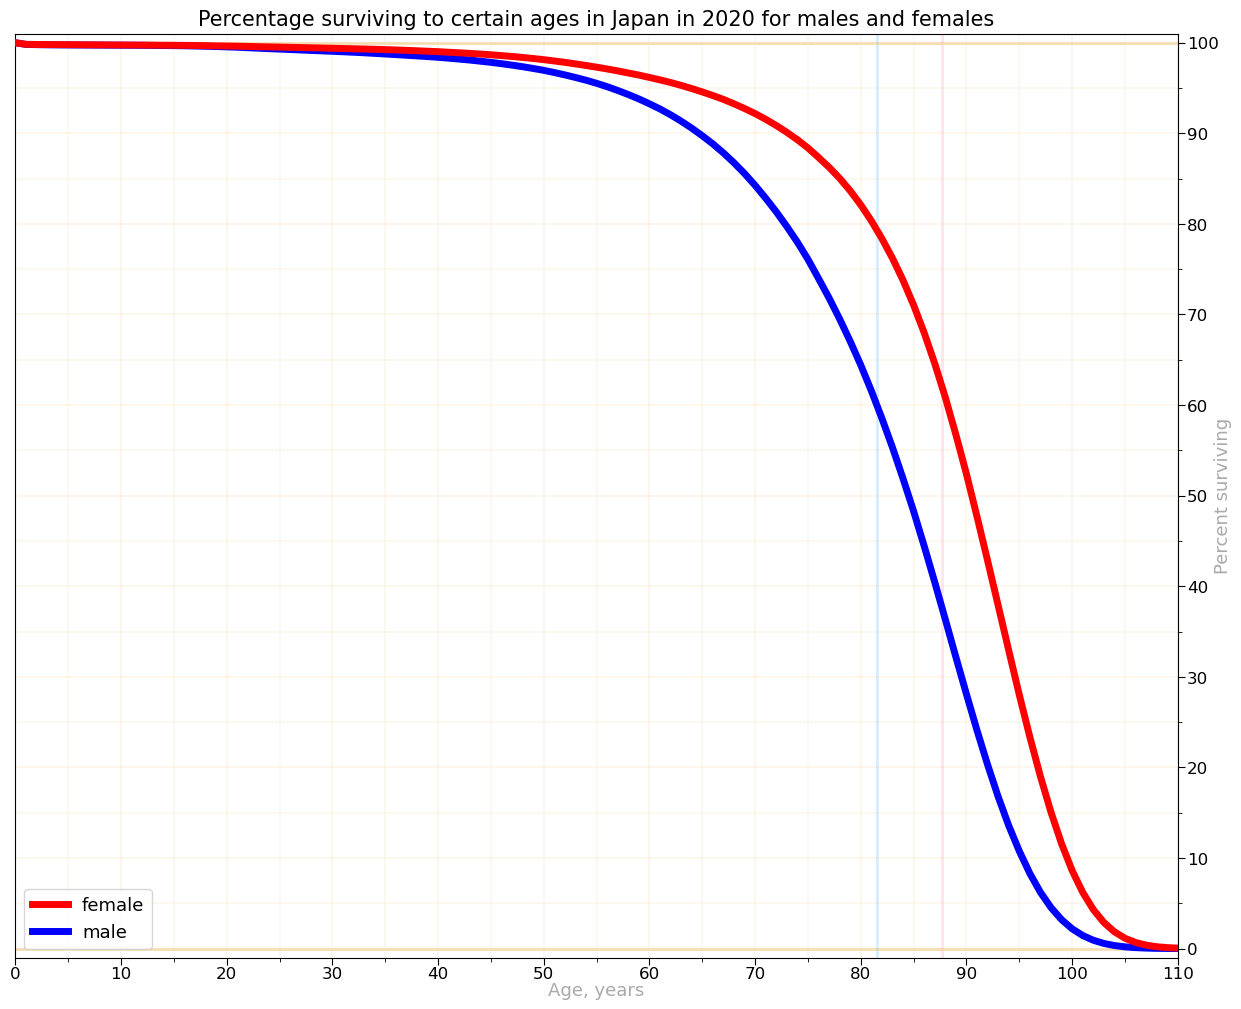

In [14]:
def create_chart(
        df, lang=LANG, dd_display='', ncol=2,
        title_en='Title of the chart', title_ru='Заголовок графика',
        le_male=None, le_female=None,
        destination=DESTINATION_CHART, file_name=''):

    plt.rcParams['figure.figsize'] = (16, 12.5) if lang=='ru' else (15, 12)
    
    fig, ax = plt.subplots()   # Create a figure and axis
    ax.yaxis.tick_right()  # show ticks only at the left side
    ax.yaxis.set_label_position("right")  # set the label position to the right 

    ax.xaxis.set_major_locator(MultipleLocator(10))   # Set major ticks to be multiples of 10
    ax.xaxis.set_minor_locator(MultipleLocator(5))    # Set minor ticks to be multiples of 5
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(5))

    # Customize tick lengths
    ax.tick_params(axis='x', which='major', length=5, pad=1.5)  # Major ticks are longer
    ax.tick_params(axis='x', which='minor', length=3)  # Minor ticks are shorter
    ax.tick_params(axis='y', which='major', length=5, pad=1.5)  # Major ticks are longer
    ax.tick_params(axis='y', which='minor', length=3)  # Minor ticks are shorter
    plt.xticks(fontsize=12)  # font size for tick labels
    plt.yticks(fontsize=12)
    
    x_min = y_min = 0
    x_max = 110
    y_max = 100
    plt.xlim(0, 110)
    plt.ylim(-1, 101)

    plt.grid(which='major', color='wheat', linewidth=0.35)
    plt.grid(which='minor', color='wheat', linewidth=0.3)

    plt.axhline(y=100, color='wheat', linewidth=2)
    plt.axhline(y=0, color='wheat', linewidth=2)

    plt.title(title_ru if lang=='ru' else title_en, fontsize=15)
    plt.xlabel('Возраст, годы' if lang=='ru' else 'Age, years', fontsize=13, color='darkgray', labelpad=-0.5)
    plt.ylabel('Процент выживших' if lang=='ru' else 'Percent surviving', fontsize=13, color='darkgray', labelpad=-3.5)
    # plt.ylabel('Доля выживших' if lang=='ru' else 'Survival Rate', fontsize=13, color='darkgray')  # , labelpad=-2

    if le_male:
        plt.axvline(x=le_male, color='lightskyblue', linewidth=2, alpha=0.35)
    if le_female:
        plt.axvline(x=le_female, color='lightpink', linewidth=2, alpha=0.35)
    
    for i, gr in enumerate(df.index.to_list()):
        ser = df.loc[gr]
        line_name = dd_display[gr].ru_name if lang=='ru' else dd_display[gr].en_name
        plt.plot(ser, color=dd_display[gr].color, linestyle=dd_display[gr].style,
                 linewidth=dd_display[gr].width, label=line_name, alpha=dd_display[gr].alpha, zorder=100-i)

    plt.legend(loc='lower left', fontsize=13, ncol=ncol)

    if destination == 'file':
        plt.savefig(f"output_charts/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()


dd_display = {
    'females'       : DisplayedGroup(en_name='female',      ru_name='женщины',         color='red',  style='-',  width=5, alpha=1),
    # 'all_t'       : DisplayedGroup(en_name='Population Overall', ru_name='население в целом',       color='lightgrey',  style='-',  width=6, alpha=1),
    'males'       : DisplayedGroup(en_name='male',    ru_name='мужчины',         color='blue',  style='-', width=5, alpha=1),
}

create_chart(df.T.loc[['females', 'males']] / 1000,
             dd_display=dd_display, ncol=1, lang=LANG,
             title_en='Percentage surviving to certain ages in Japan in 2020 for males and females',  # , overall statistics for males and females
             title_ru='Процент выживших к определённому возрасту в Японии в 2020 для мужчин и женщин',
             le_male=81.58, le_female=87.73,
             file_name='Percentage Surviving to Certain Ages in Japan')

<br>

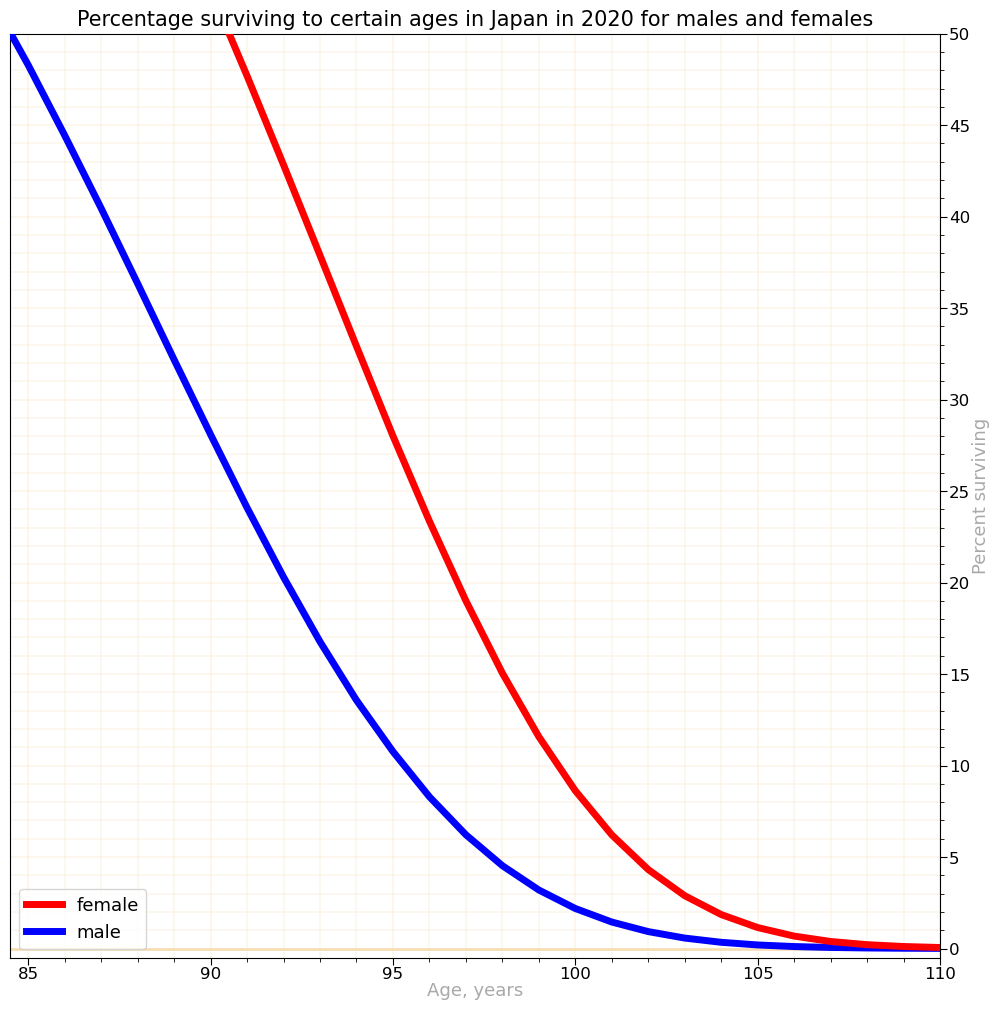

In [16]:
def create_chart_zoomed(
        df, lang=LANG, dd_display='', ncol=2,
        title_en='Title of the chart', title_ru='Заголовок графика',
        destination=DESTINATION_CHART, file_name=''):

    plt.rcParams['figure.figsize'] = (12.5, 12) if lang=='ru' else (12, 12)
    
    fig, ax = plt.subplots()   # Create a figure and axis
    ax.yaxis.tick_right()  # show ticks only at the left side
    ax.yaxis.set_label_position("right")  # set the label position to the right 

    ax.xaxis.set_major_locator(MultipleLocator(5))   # Set major ticks to be multiples of 10
    ax.xaxis.set_minor_locator(MultipleLocator(1))    # Set minor ticks to be multiples of 5
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(1))

    # Customize tick lengths
    ax.tick_params(axis='x', which='major', length=5, pad=1.5)  # Major ticks are longer
    ax.tick_params(axis='x', which='minor', length=3)  # Minor ticks are shorter
    ax.tick_params(axis='y', which='major', length=5, pad=1.5)  # Major ticks are longer
    ax.tick_params(axis='y', which='minor', length=3)  # Minor ticks are shorter
    plt.xticks(fontsize=12)  # font size for tick labels
    plt.yticks(fontsize=12)
    
    x_min = y_min = 0
    x_max = 110
    y_max = 100
    plt.xlim(84.5, 110)
    plt.ylim(-0.5, 50)

    # for version with ratio
    # labels_y = range(y_min, y_max+1, 10)
    # y_labels_names = ((f"{v/100:.1f}" if v % 100 != 0  else v//100) for v in labels_y)
    # plt.yticks(labels_y, labels=y_labels_names)

    plt.grid(which='major', color='wheat', linewidth=0.35)
    plt.grid(which='minor', color='wheat', linewidth=0.3)

    # plt.axhline(y=100, color='wheat', linewidth=2)
    plt.axhline(y=0, color='wheat', linewidth=2)

    plt.title(title_ru if lang=='ru' else title_en, fontsize=15)
    plt.xlabel('Возраст, годы' if lang=='ru' else 'Age, years', fontsize=13, color='darkgray', labelpad=-0.5)
    plt.ylabel('Процент выживших' if lang=='ru' else 'Percent surviving', fontsize=13, color='darkgray', labelpad=1)
    # plt.ylabel('Доля выживших' if lang=='ru' else 'Survival Rate', fontsize=13, color='darkgray')  # , labelpad=-2
    
    for i, gr in enumerate(df.index.to_list()):
        ser = df.loc[gr]
        line_name = dd_display[gr].ru_name if lang=='ru' else dd_display[gr].en_name
        plt.plot(ser, color=dd_display[gr].color, linestyle=dd_display[gr].style,
                 linewidth=dd_display[gr].width, label=line_name, alpha=dd_display[gr].alpha, zorder=100-i)

    plt.legend(loc='lower left', fontsize=13, ncol=ncol)

    if destination == 'file':
        plt.savefig(f"output_charts/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()


dd_display = {
    'females'       : DisplayedGroup(en_name='female',      ru_name='женщины',         color='red',  style='-',  width=5, alpha=1),
    # 'all_t'       : DisplayedGroup(en_name='Population Overall', ru_name='население в целом',       color='lightgrey',  style='-',  width=6, alpha=1),
    'males'       : DisplayedGroup(en_name='male',    ru_name='мужчины',         color='blue',  style='-', width=5, alpha=1),

    # 'females_pref1'       : DisplayedGroup(en_name='female',      ru_name='женщины',         color='red',  style='-',  width=5, alpha=1),
    # 'males_pref1'       : DisplayedGroup(en_name='male',    ru_name='мужчины',         color='blue',  style='-', width=5, alpha=1),
}

create_chart_zoomed(df.T.loc[['females', 'males']] / 1000,
             dd_display=dd_display, ncol=1, lang=LANG,
             title_en='Percentage surviving to certain ages in Japan in 2020 for males and females',  # , overall statistics for males and females
             title_ru='Процент выживших к определённому возрасту в Японии в 2020 для мужчин и женщин',
             file_name='Percentage Surviving to Certain Ages in Japan -zoomed')

<br>

In [18]:
# for manual check
df.T.loc[['females', 'males']] / 1000

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
females,100.0,99.826,99.808,99.799,99.789,99.783,99.776,99.769,99.763,99.756,...,6.213,4.316,2.887,1.856,1.146,0.679,0.385,0.21,0.110,0.055
males,100.0,99.813,99.788,99.772,99.763,99.754,99.748,99.743,99.736,99.732,...,1.448,0.925,0.571,0.340,0.195,0.108,0.058,0.03,0.015,0.007


<br>

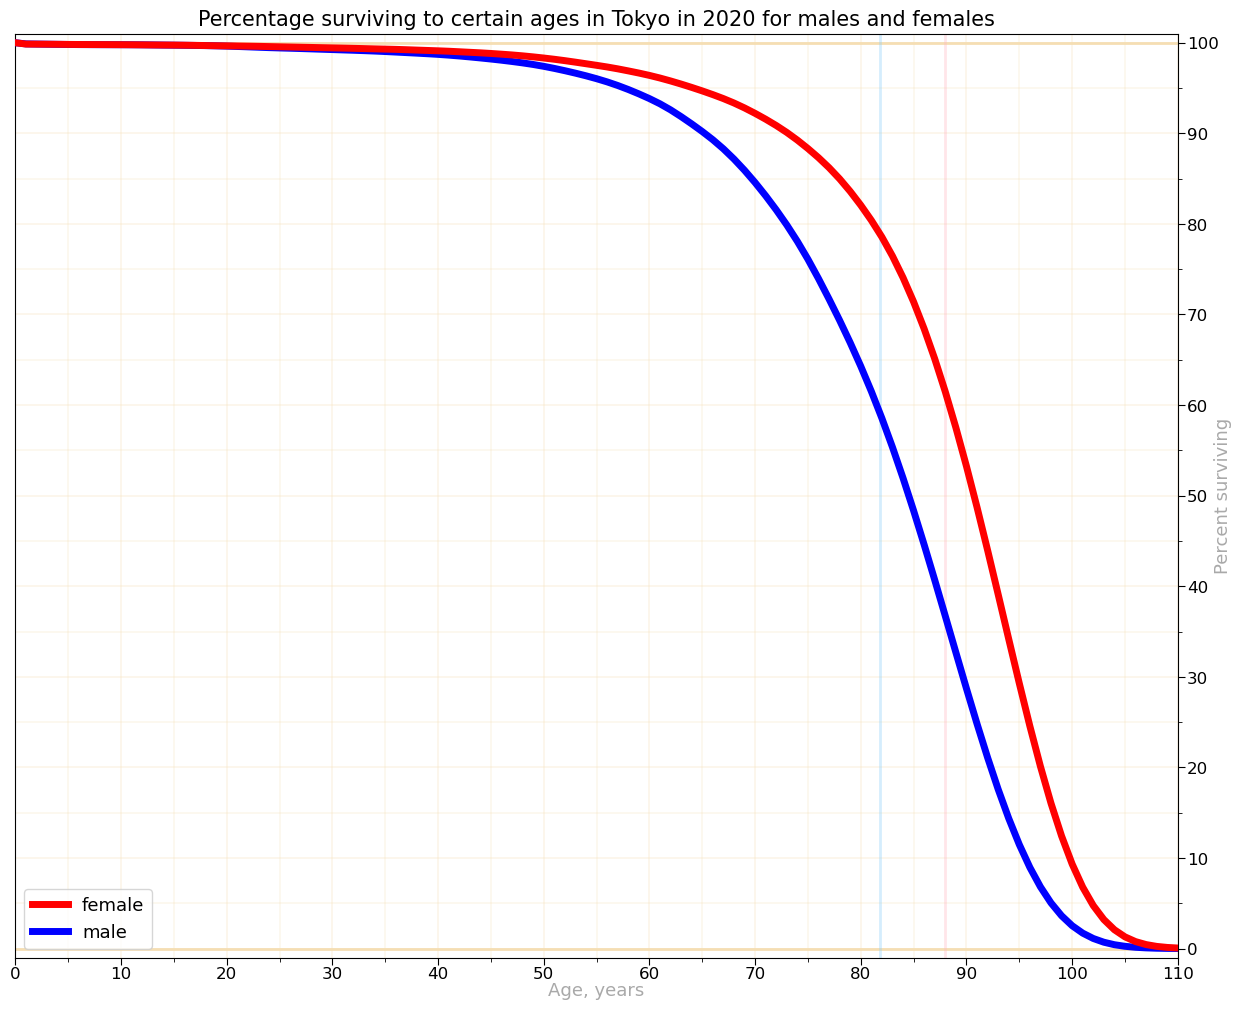

In [20]:
# chart for Tokyo

assert NMB_PREF1 == 13

create_chart(df.T.loc[['females_pref1', 'males_pref1']] \
               .rename(index={'females_pref1': 'females', 'males_pref1': 'males'}) / 1000,
             dd_display=dd_display, ncol=1, lang=LANG,
             title_en='Percentage surviving to certain ages in Tokyo in 2020 for males and females',  # , overall statistics for males and females
             title_ru='Процент выживших к определённому возрасту в Токио в 2020 для мужчин и женщин',
             le_male=81.86, le_female=87.96,
             file_name='Percentage Surviving to Certain Ages in Tokyo')

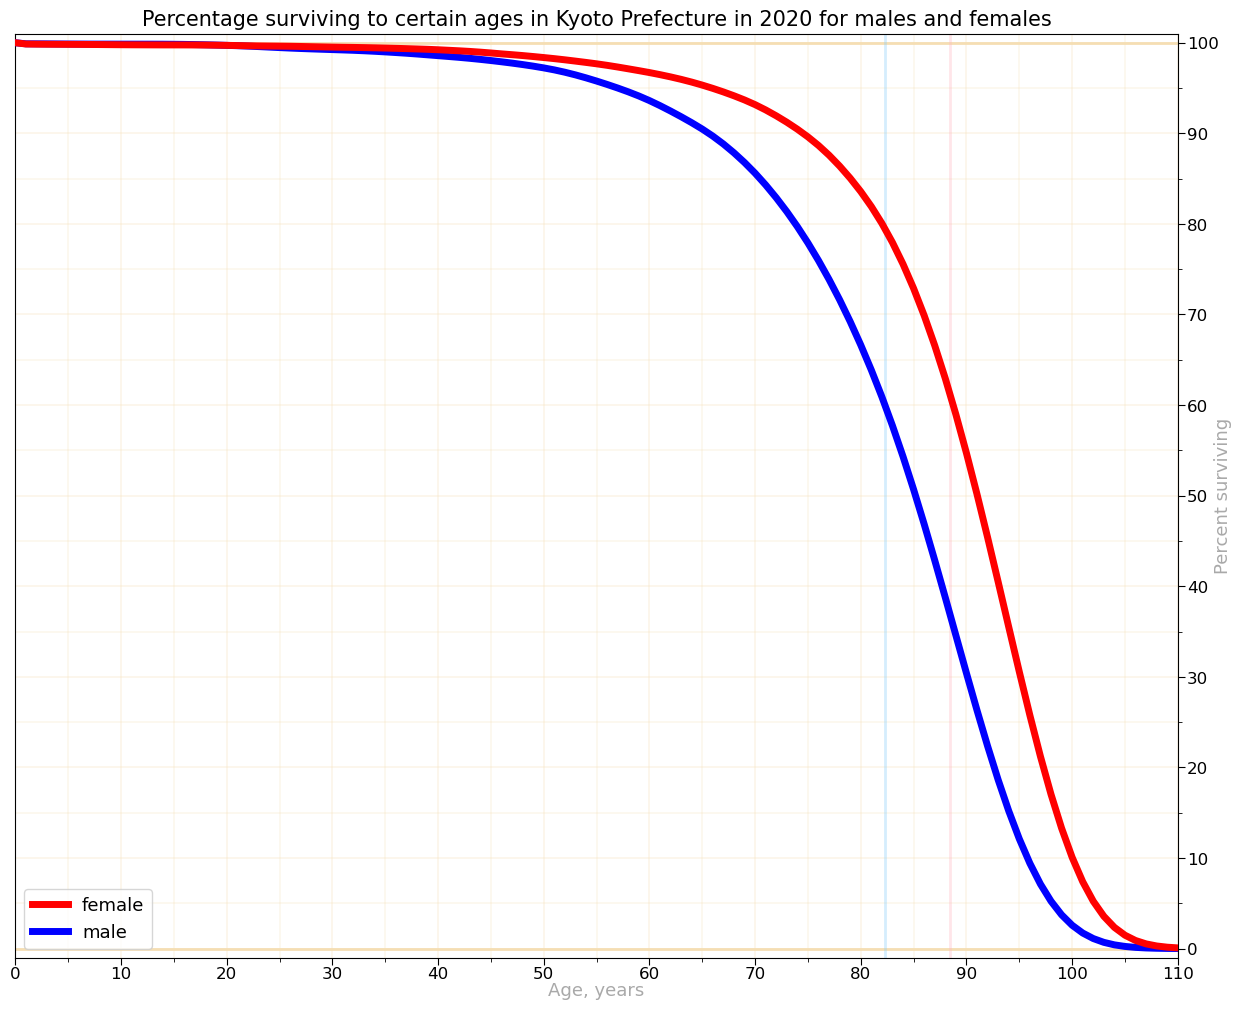

In [21]:
# chart for Kyoto Prefecture

assert NMB_PREF2 == 26

create_chart(df.T.loc[['females_pref2', 'males_pref2']] \
               .rename(index={'females_pref2': 'females', 'males_pref2': 'males'}) / 1000,
             dd_display=dd_display, ncol=1, lang=LANG,
             title_en='Percentage surviving to certain ages in Kyoto Prefecture in 2020 for males and females',  # , overall statistics for males and females
             title_ru='Процент выживших к определённому возрасту в префектуре Киото в 2020 для мужчин и женщин',
             le_male=82.34, le_female=88.49,
             file_name='Percentage Surviving to Certain Ages in Kyoto Prefecture')

In [22]:
# # chart for Shiga Prefecture

# assert NMB_PREF2 == 25

# create_chart(df.T.loc[['females_pref2', 'males_pref2']] \
#                .rename(index={'females_pref2': 'females', 'males_pref2': 'males'}) / 1000,
#              dd_display=dd_display, ncol=1, lang=LANG,
#              title_en='Percentage surviving to certain ages in Shiga Prefecture in 2020 for males and females',  # , overall statistics for males and females
#              title_ru='Процент выживших к определённому возрасту в префектуре Сига в 2020 для мужчин и женщин',
#              le_male=82.88, le_female=88.39,
#              file_name='Percentage Surviving to Certain Ages in Shiga Prefecture')